In [43]:
import mne
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['svg.fonttype'] = 'none'
matplotlib.rcParams['font.family'] = 'Arial'

%matplotlib inline

train_clr = 'blue'
train_cmap = "Blues"

dev_clr = 'red'
dev_cmap = "OrRd"

test_clr = 'green'
test_cmap = "YlGn"

In [3]:
train = mne.read_epochs('../Decoding_Pos/class_matched2_epochs_train-epo.fif', preload=False)
dev = mne.read_epochs('../Decoding_PoS/class_matched2_epochs_dev-epo.fif', preload=False)
test = mne.read_epochs('../Decoding_PoS/class_matched_epochs_ica_weak_epoch_bc_test-epo.fif', preload=False)

Reading ../Decoding_Pos/class_matched2_epochs_train-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =       0.00 ...     700.00 ms
        0 CTF compensation matrices available
Reading ../Decoding_Pos\class_matched2_epochs_train-epo-1.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =       0.00 ...     700.00 ms
        0 CTF compensation matrices available


<ipython-input-3-01099adbd52e>:1: RuntimeWarning: Event number greater than 2147483647 created, events[:, 0] will be assigned consecutive increasing integer values
  train = mne.read_epochs('../Decoding_Pos/class_matched2_epochs_train-epo.fif', preload=False)


Adding metadata with 19 columns
Replacing existing metadata with 19 columns
45502 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading ../Decoding_PoS/class_matched2_epochs_dev-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =       0.00 ...     700.00 ms
        0 CTF compensation matrices available
Adding metadata with 19 columns
Replacing existing metadata with 19 columns
6658 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading ../Decoding_PoS/class_matched_epochs_ica_weak_epoch_bc_test-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =       0.00 ...     700.00 ms
        0 CTF compensation matrices available
A

# Train

In [5]:
lex_description = 'pos == "NOUN" or pos == "VERB" or pos == "ADJ" or pos == "PROPN" or pos == "ADV"'
gram_description = 'pos == "ADP" or pos == "DET" or pos == "PRON" or pos == "AUX" or pos == "SCONJ" or pos == "CCONJ"'

matched_clr = 'r'

def round_to_half(x):
    return np.round(x*2) / 2

def round_to_quarter(x):
    return np.round(x*4) / 4

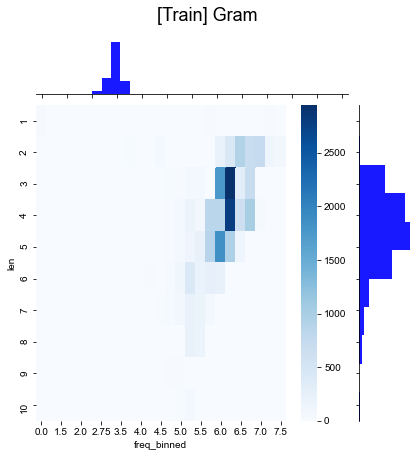

<Figure size 288x360 with 0 Axes>

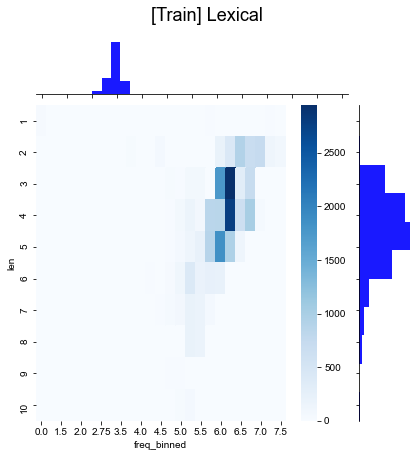

<Figure size 288x360 with 0 Axes>

In [44]:
tmp = train.metadata
tmp['freq_binned'] = tmp['freq'].apply(round_to_quarter)

lex_len = tmp.query(lex_description).len
lex_freq = tmp.query(lex_description).freq_binned
#lex_freq = lex_class.replace(('LEX', 'GRAM'), (1,0))

gram_len = tmp.query(gram_description).len
gram_freq = tmp.query(gram_description).freq_binned
#gram_class = hf_class.replace(('LEX', 'GRAM'), (1,0))

lex = tmp.query(lex_description)
#lex = lex.query('wordclass == "LEX" or wordclass == "GRAM"')
lex_freq_len = lex[['freq_binned', 'freq', 'len']]
lex_crosstab = pd.crosstab(lex_freq_len.len, lex_freq_len.freq_binned)

gram = tmp.query(gram_description)
#gram = gram.query('wordclass == "LEX" or wordclass == "GRAM"')
gram_freq_len = gram[['freq_binned', 'freq', 'len']]
gram_crosstab = pd.crosstab(gram_freq_len.len, gram_freq_len.freq_binned)

crosstab = gram_crosstab

class jp:
    def __call__(self, x, y):
        ax=plt.gca()
        plt.figure(figsize=(4,5))
        sns.heatmap(crosstab, cmap=train_cmap, ax=ax)

g = sns.JointGrid(x=gram_freq_len.freq_binned, y=gram_freq_len.len).plot_joint(jp())

_ = g.ax_marg_x.hist(gram_freq, color=train_clr, alpha=0.9, orientation='vertical')
_ = g.ax_marg_y.hist(gram_len, color=train_clr, alpha=0.9, orientation='horizontal')
_ = g.ax_marg_y.set_label('Length')
_ = g.fig.suptitle(f"[Train] Gram", fontsize=18, y=1.05) 
g.savefig(f'class_train_gram.svg', format='svg')

crosstab = lex_crosstab

class jp:
    def __call__(self, x, y):
        ax=plt.gca()
        plt.figure(figsize=(4,5))
        sns.heatmap(crosstab, cmap=train_cmap, ax=ax)
        
g = sns.JointGrid(x=lex_freq_len.freq_binned, y=lex_freq_len.len).plot_joint(jp())

_ = g.ax_marg_x.hist(lex_freq, color=train_clr, alpha=0.9, orientation='vertical')
_ = g.ax_marg_y.hist(lex_len, color=train_clr, alpha=0.9, orientation='horizontal')
_ = g.ax_marg_y.set_label('Length')
_ = g.fig.suptitle(f"[Train] Lexical", fontsize=18, y=1.05)
g.savefig(f'class_train_lex.svg', format='svg')


# Dev

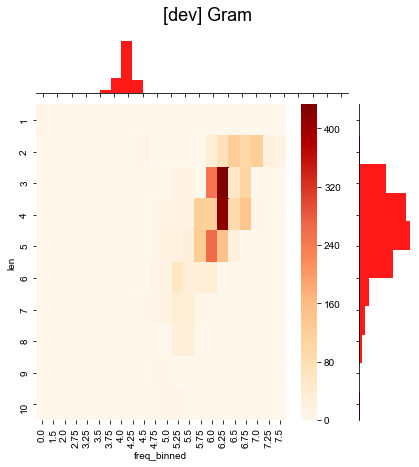

<Figure size 288x360 with 0 Axes>

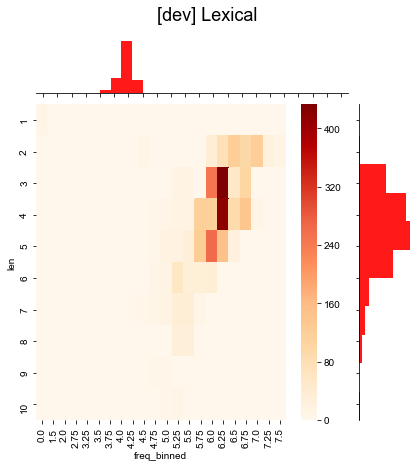

<Figure size 288x360 with 0 Axes>

In [45]:
tmp = dev.metadata
tmp['freq_binned'] = tmp['freq'].apply(round_to_quarter)

lex_len = tmp.query(lex_description).len
lex_freq = tmp.query(lex_description).freq_binned
#lex_freq = lex_class.replace(('LEX', 'GRAM'), (1,0))

gram_len = tmp.query(gram_description).len
gram_freq = tmp.query(gram_description).freq_binned
#gram_class = hf_class.replace(('LEX', 'GRAM'), (1,0))

lex = tmp.query(lex_description)
#lex = lex.query('wordclass == "LEX" or wordclass == "GRAM"')
lex_freq_len = lex[['freq_binned', 'freq', 'len']]
lex_crosstab = pd.crosstab(lex_freq_len.len, lex_freq_len.freq_binned)

gram = tmp.query(gram_description)
#gram = gram.query('wordclass == "LEX" or wordclass == "GRAM"')
gram_freq_len = gram[['freq_binned', 'freq', 'len']]
gram_crosstab = pd.crosstab(gram_freq_len.len, gram_freq_len.freq_binned)

crosstab = gram_crosstab

class jp:
    def __call__(self, x, y):
        ax=plt.gca()
        plt.figure(figsize=(4,5))
        sns.heatmap(crosstab, cmap=dev_cmap, ax=ax)

g = sns.JointGrid(x=gram_freq_len.freq_binned, y=gram_freq_len.len).plot_joint(jp())

_ = g.ax_marg_x.hist(gram_freq, color=dev_clr, alpha=0.9, orientation='vertical')
_ = g.ax_marg_y.hist(gram_len, color=dev_clr, alpha=0.9, orientation='horizontal')
_ = g.ax_marg_y.set_label('Length')
_ = g.fig.suptitle(f"[dev] Gram", fontsize=18, y=1.05) 
g.savefig(f'class_dev_gram.svg', format='svg')

crosstab = lex_crosstab

class jp:
    def __call__(self, x, y):
        ax=plt.gca()
        plt.figure(figsize=(4,5))
        sns.heatmap(crosstab, cmap=dev_cmap, ax=ax)
        
g = sns.JointGrid(x=lex_freq_len.freq_binned, y=lex_freq_len.len).plot_joint(jp())

_ = g.ax_marg_x.hist(lex_freq, color=dev_clr, alpha=0.9, orientation='vertical')
_ = g.ax_marg_y.hist(lex_len, color=dev_clr, alpha=0.9, orientation='horizontal')
_ = g.ax_marg_y.set_label('Length')
_ = g.fig.suptitle(f"[dev] Lexical", fontsize=18, y=1.05)
g.savefig(f'class_dev_lex.svg', format='svg')


## Test

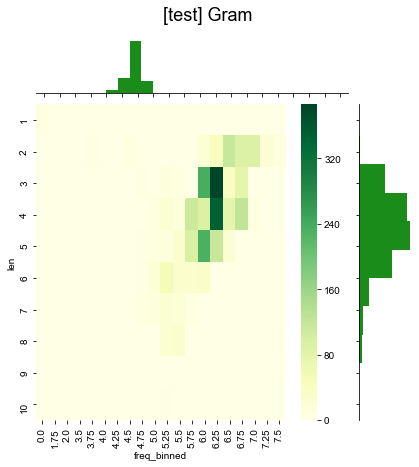

<Figure size 288x360 with 0 Axes>

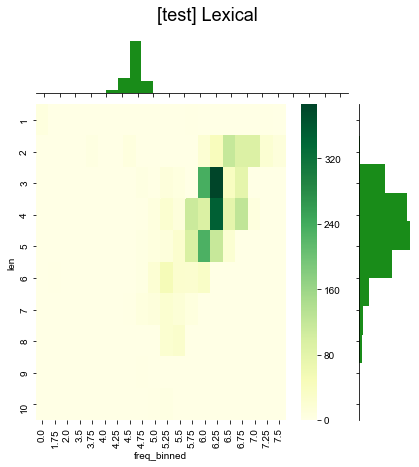

<Figure size 288x360 with 0 Axes>

In [46]:
tmp = test.metadata
tmp['freq_binned'] = tmp['freq'].apply(round_to_quarter)

lex_len = tmp.query(lex_description).len
lex_freq = tmp.query(lex_description).freq_binned
#lex_freq = lex_class.replace(('LEX', 'GRAM'), (1,0))

gram_len = tmp.query(gram_description).len
gram_freq = tmp.query(gram_description).freq_binned
#gram_class = hf_class.replace(('LEX', 'GRAM'), (1,0))

lex = tmp.query(lex_description)
#lex = lex.query('wordclass == "LEX" or wordclass == "GRAM"')
lex_freq_len = lex[['freq_binned', 'freq', 'len']]
lex_crosstab = pd.crosstab(lex_freq_len.len, lex_freq_len.freq_binned)

gram = tmp.query(gram_description)
#gram = gram.query('wordclass == "LEX" or wordclass == "GRAM"')
gram_freq_len = gram[['freq_binned', 'freq', 'len']]
gram_crosstab = pd.crosstab(gram_freq_len.len, gram_freq_len.freq_binned)

crosstab = gram_crosstab

class jp:
    def __call__(self, x, y):
        ax=plt.gca()
        plt.figure(figsize=(4,5))
        sns.heatmap(crosstab, cmap=test_cmap, ax=ax)

g = sns.JointGrid(x=gram_freq_len.freq_binned, y=gram_freq_len.len).plot_joint(jp())

_ = g.ax_marg_x.hist(gram_freq, color=test_clr, alpha=0.9, orientation='vertical')
_ = g.ax_marg_y.hist(gram_len, color=test_clr, alpha=0.9, orientation='horizontal')
_ = g.ax_marg_y.set_label('Length')
_ = g.fig.suptitle(f"[test] Gram", fontsize=18, y=1.05) 
g.savefig(f'class_test_gram.svg', format='svg')

crosstab = lex_crosstab

class jp:
    def __call__(self, x, y):
        ax=plt.gca()
        plt.figure(figsize=(4,5))
        sns.heatmap(crosstab, cmap=test_cmap, ax=ax)
        
g = sns.JointGrid(x=lex_freq_len.freq_binned, y=lex_freq_len.len).plot_joint(jp())

_ = g.ax_marg_x.hist(lex_freq, color=test_clr, alpha=0.9, orientation='vertical')
_ = g.ax_marg_y.hist(lex_len, color=test_clr, alpha=0.9, orientation='horizontal')
_ = g.ax_marg_y.set_label('Length')
_ = g.fig.suptitle(f"[test] Lexical", fontsize=18, y=1.05)
g.savefig(f'class_test_lex.svg', format='svg')
